In [1]:
# (31/10/2022) Monday

# Let's Explore:

<img src="https://i.pinimg.com/originals/39/ee/da/39eedadcaa377486eebc0ed3555dae83.jpg">
<img src="https://www.timetravelturtle.com/wp-content/uploads/2013/11/Germany-2013-41_feat.jpg">

**Hohenzollern Castle, Germany:**

If you want to enjoy this wonderful panorama, you have to take a trip to Baden-Württemberg, more precisely to the Swabian Alps. Here you’ll find the imposing 855-metre-high Mount Hohenzollern, on the summit of which a castle of the same name is enthroned, one of the most beautiful and most visited fortifications in Europe.

The castle is the ancestral seat of the Hohenzollerns, the once-ruling Prussian royal and German imperial house. Two medieval castles once stood on this site, before being destroyed or falling into disrepair over the centuries, but the fortress in today’s image was rebuilt between 1850 and 1867.

Hohenzollern Castle is privately owned but open to the public. With over 300,000 visitors annually, it is one of the main tourist attractions of the federal state of Baden-Württemberg. Due to its exposed location, it offers a breathtaking panoramic view with up to 100 kilometres of distant landscapes in clear weather.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import nltk as nl
from sklearn.preprocessing import LabelEncoder
# nl.download('stopwords')
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# from wordcloud import WordCloud
# from collections import Counter
# import ast

In [3]:
df = pd.read_csv('Heigth&Weight.csv')

In [4]:
df.sample(3)

,Gender,Height,Weight
7142,Female,61.278813,135.081159
6100,Female,62.375418,134.870906
2669,Male,67.718393,182.361397


## Mean Squared Error  or Root Mean Error:

The Mean Squared Error measures how close a regression line is to a set of data points.

<img src='https://www.gstatic.com/education/formulas2/472522532/en/mean_squared_error.svg'>

<a href='https://www.freecodecamp.org/news/machine-learning-mean-squared-error-regression-line-c7dde9a26b93/'> Machine learning: an introduction to mean squared error and regression lines </a>

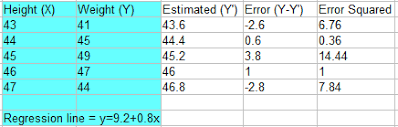

<table>
<td width='500px'>
<img src='https://vitalflux.com/wp-content/uploads/2020/09/Regression-terminologies-Page-3.png'>
</td>
<td width='500px'>
<img src='https://images.squarespace-cdn.com/content/v1/5acbdd3a25bf024c12f4c8b4/1600368657769-5BJU5FK86VZ6UXZGRC1M/Mean+Squared+Error.png'>
</td>
</table>

In [5]:
# Making a linear model:

car_data = pd.read_csv('car_data.csv')

In [6]:
car_data.head(3)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol


<img src='slope.png'>

In [7]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [8]:
car_data['Price']

0             80,000
1           4,25,000
2      Ask For Price
3           3,25,000
4           5,75,000
           ...      
887         3,10,000
888         2,60,000
889         3,90,000
890         1,80,000
891         1,60,000
Name: Price, Length: 892, dtype: object

In [9]:
car_data.year.unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [10]:
car_data.kms_driven.unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [11]:
car_data.fuel_type.unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [12]:
#Done